<a href="https://colab.research.google.com/github/flyingninja97/SimpleLaneDetection/blob/master/Simple_Lane_Detction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
! git clone https://github.com/rslim087a/road-image

Cloning into 'road-image'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4
Unpacking objects: 100% (4/4), done.


In [3]:
!ls road-image

test_image.jpg


In [0]:
img=cv2.imread('road-image/test_image.jpg')
img_copy=np.copy(img)

In [0]:
def canny(image):
    gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    blur_gray_img=cv2.GaussianBlur(gray,(5,5),0)
    canny=cv2.Canny(blur_gray_img,50,150)
    return canny

In [0]:
canny_image=canny(img_copy)

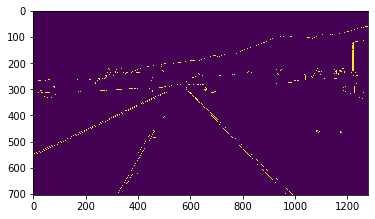

In [7]:
plt.imshow(canny_image)
plt.show()

In [0]:
def region_of_interest(image):
    height=image.shape[0]
    triangles=np.array([[(200,height),(1100,height),(550,300)]])
    mask=np.zeros_like(image)
    cv2.fillPoly(mask,triangles,255)
    roi_img=cv2.bitwise_and(mask,image)
    return roi_img

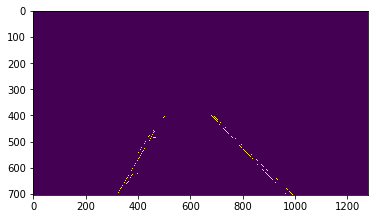

In [9]:
cropped_image=region_of_interest(canny_image)
plt.imshow(cropped_image)
plt.show()

In [10]:
lines=cv2.HoughLinesP(cropped_image,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
print(lines)
print(lines.shape)

[[[750 465 834 549]]

 [[704 426 807 533]]

 [[331 684 451 483]]

 [[900 613 976 689]]

 [[767 493 969 702]]

 [[688 401 754 467]]

 [[806 519 878 593]]

 [[403 541 433 495]]]
(8, 1, 4)


In [0]:
def display_lines(image,lines):
    lines_image=np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(lines_image,(x1,y1),(x2,y2),(255,0,0),10)
        return lines_image

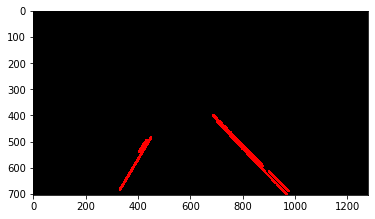

In [12]:
only_line_img=display_lines(img_copy,lines)
plt.imshow(only_line_img)
plt.show()

In [0]:
weighted_img = cv2.addWeighted(img_copy,0.8,only_line_img,1.0,0.0)

<function matplotlib.pyplot.show>

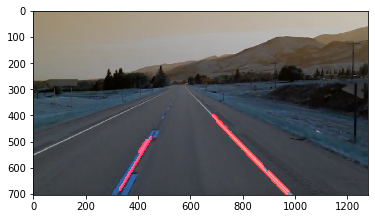

In [14]:
plt.imshow(weighted_img)
plt.show

In [0]:
def make_coordinates(image,line_parameters):
    print(line_parameters)

    slope,intercept=line_parameters
    y1=image.shape[0]
    y2=int(y1*(3/5))
    x1=int((y1-intercept)/slope)
    x2=int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])
    

In [0]:
def average_slope_intercept(image,lines):
    left_fit=[]
    right_fit=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        #polyfit will fit the coordinates in a particular degree polygon 
        #and it will return the vector consisting of the slope and y-intercept
        parameters=np.polyfit((x1,x2),(y1,y2),1)
        slope=parameters[0]
        intercept=parameters[1]
        if(slope<0):
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average=np.average(left_fit,axis=0)
    right_fit_average=np.average(right_fit,axis=0)
    left_line=make_coordinates(image,left_fit_average)
    right_line=make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])
    
        
        

In [17]:
average_line_img=average_slope_intercept(img_copy,lines)
only_line_average=display_lines(img_copy,average_line_img)
weight_img=cv2.addWeighted(img_copy,0.8,only_line_average,1.0,0.0)

[  -1.60416667 1198.67916667]
[   1.0168777  -295.71798377]


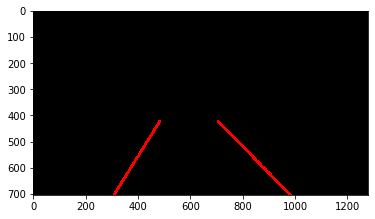

In [18]:
plt.imshow(only_line_average)
plt.show()

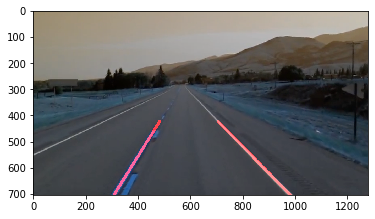

In [19]:
plt.imshow(weight_img)
plt.show()

In [0]:
def play_video(source): 
    cap = cv2.VideoCapture(source)
    if (cap.isOpened()== False):  
      print("Error opening video  file") 

    while(cap.isOpened()):      
      ret, frame = cap.read() 
      if ret == True:
            c=canny(frame)
            roi=region_of_interest(c)
            lines=cv2.HoughLinesP(roi,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
            averaged_lines=average_slope_intercept(frame,lines)
            only_l_img=display_lines(frame,averaged_lines)
            w_img = cv2.addWeighted(frame,0.8,only_l_img,1.0,0.0)
            cv2.imshow('Frame', w_img)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
      else:
        break    
    cap.release()     
    cv2_imshow.destroyAllWindows() 



In [21]:
! git clone https://github.com/rslim087a/road-video

Cloning into 'road-video'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


In [22]:
!ls road-video


test2.mp4
